In [1]:
using DataFrames, CSV, Missings, CategoricalArrays, Query
using RDatasets
using Gadfly

INFO: Recompiling stale cache file /Users/andy/.julia/lib/v0.6/TableTraits.ji for module TableTraits.
INFO: Recompiling stale cache file /Users/andy/.julia/lib/v0.6/IterableTables.ji for module IterableTables.
INFO: Recompiling stale cache file /Users/andy/.julia/lib/v0.6/QueryOperators.ji for module QueryOperators.


## DataFrame

In [2]:
df = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])

4×2 DataFrames.DataFrame
│ Row │ A │ B │
├─────┼───┼───┤
│ 1   │ 1 │ M │
│ 2   │ 2 │ F │
│ 3   │ 3 │ F │
│ 4   │ 4 │ M │

In [5]:
df = DataFrame() # 先初始化一個空的，再放入資料 
df[:A] = 1:8
df[:B] = ["M", "F", "F", "M", "F", "M", "M", "F"] 
df

8×2 DataFrames.DataFrame
│ Row │ A │ B │
├─────┼───┼───┤
│ 1   │ 1 │ M │
│ 2   │ 2 │ F │
│ 3   │ 3 │ F │
│ 4   │ 4 │ M │
│ 5   │ 5 │ F │
│ 6   │ 6 │ M │
│ 7   │ 7 │ M │
│ 8   │ 8 │ F │

In [6]:
# 用數字索引
df[1, 1]

1

In [8]:
# 用欄位索引
df[1, :A]

1

In [9]:
# 維度
size(df)

(8, 2)

In [10]:
# 列數
nrow(df)

8

In [11]:
#行數
ncol(df)

2

In [12]:
#取得欄位名稱
names(df)

2-element Array{Symbol,1}:
 :A
 :B

In [13]:
df[1:3, :] # 取1~3列，跟所有欄位

3×2 DataFrames.DataFrame
│ Row │ A │ B │
├─────┼───┼───┤
│ 1   │ 1 │ M │
│ 2   │ 2 │ F │
│ 3   │ 3 │ F │

In [14]:
df[1:3, [:B, :A]] # 取1~3列，跟指定欄位

3×2 DataFrames.DataFrame
│ Row │ B │ A │
├─────┼───┼───┤
│ 1   │ M │ 1 │
│ 2   │ F │ 2 │
│ 3   │ F │ 3 │

In [20]:
df[df[:A] % 2 .== 0, :] # 取符合條件的列，跟所有欄位

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] rem(::Array{Int64,1}, ::Int64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/andy/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/andy/.julia/v0.6/Compat/src/Compat.jl:386
 [6] eventloop(::ZMQ.Socket) at /Users/andy/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[20], in expression starting on line 1


4×2 DataFrames.DataFrame
│ Row │ A │ B │
├─────┼───┼───┤
│ 1   │ 2 │ F │
│ 2   │ 4 │ M │
│ 3   │ 6 │ M │
│ 4   │ 8 │ F │

In [21]:
mean(df[1]) # 對第一列取平均

4.5

In [22]:
median(df[:A]) # 對第一個欄位取中位數

4.5

In [23]:
df = DataFrame(A = 1:4, B = randn(4))
colwise(cumsum, df)

2-element Array{Array{T,1} where T,1}:
 [1, 3, 6, 10]                             
 [-1.10533, -2.11886, -0.737488, -0.663883]

### 匯入csv

In [25]:
CSV.read("test.csv")

4×3 DataFrames.DataFrame
│ Row │ name  │ age │ squidPerWeek │
├─────┼───────┼─────┼──────────────┤
│ 1   │ Alice │ 36  │ 3.14         │
│ 2   │ Bob   │ 24  │ 0.0          │
│ 3   │ Carol │ 58  │ 2.71         │
│ 4   │ Eve   │ 49  │ 7.77         │

In [26]:
df = CSV.read("test.csv", nullable=false, weakrefstrings=false)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #Source#24(::String, ::CSV.Options{Void}, ::Int64, ::Int64, ::Array{Type,1}, ::Symbol, ::Bool, ::Bool, ::Bool, ::Int64, ::Int64, ::Int64, ::Bool, ::Type{T} where T) at /Users/andy/.julia/v0.6/CSV/src/Source.jl:66
 [3] (::Core.#kw#Type)(::Array{Any,1}, ::Type{CSV.Source}) at ./<missing>:0
 [4] #Source#23(::UInt8, ::UInt8, ::UInt8, ::String, ::Void, ::Int64, ::Int64, ::Array{Type,1}, ::Symbol, ::Bool, ::Void, ::UInt8, ::String, ::String, ::Bool, ::Bool, ::Int64, ::Int64, ::Int64, ::Bool, ::Type{T} where T, ::String) at /Users/andy/.julia/v0.6/CSV/src/Source.jl:30
 [5] (::Core.#kw#Type)(::Array{Any,1}, ::Type{CSV.Source}, ::String) at ./<missing>:0
 [6] #read#43(::Bool, ::Dict{Int64,Function}, ::Bool, ::Array{Any,1}, ::Function, ::String, ::Type{T} where T) at /Users/andy/.julia/v0.6/CSV/src/Source.jl:338
 [7] (::CSV.#kw##read)(::Array{Any,1}, ::CSV.#read, ::String, ::Type{T} where T) at ./<missing>:0 (repeats 2 times

4×3 DataFrames.DataFrame
│ Row │ name  │ age │ squidPerWeek │
├─────┼───────┼─────┼──────────────┤
│ 1   │ Alice │ 36  │ 3.14         │
│ 2   │ Bob   │ 24  │ 0.0          │
│ 3   │ Carol │ 58  │ 2.71         │
│ 4   │ Eve   │ 49  │ 7.77         │

In [27]:
head(RDatasets.datasets()) # 可以選你要的資料集

6×5 DataFrames.DataFrame
│ Row │ Package │ Dataset   │ Title     │ Rows │ Columns │
├─────┼─────────┼───────────┼───────────┼──────┼─────────┤
│ 1   │ COUNT   │ affairs   │ affairs   │ 601  │ 18      │
│ 2   │ COUNT   │ azdrg112  │ azdrg112  │ 1798 │ 4       │
│ 3   │ COUNT   │ azpro     │ azpro     │ 3589 │ 6       │
│ 4   │ COUNT   │ badhealth │ badhealth │ 1127 │ 3       │
│ 5   │ COUNT   │ fasttrakg │ fasttrakg │ 15   │ 9       │
│ 6   │ COUNT   │ lbw       │ lbw       │ 189  │ 10      │

In [28]:
iris = dataset("datasets", "iris")
head(iris)

6×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │

In [29]:
size(iris)

(150, 5)

In [30]:
# 把兩個相同的DataFrame垂直地併起來
size(vcat(iris, iris))

(300, 5)

In [31]:
# 把兩個相同的DataFrame水平地併起來
size(hcat(iris, iris))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #add_names#18(::Bool, ::Function, ::DataFrames.Index, ::DataFrames.Index) at /Users/andy/.julia/v0.6/DataFrames/src/other/index.jl:190
 [3] (::DataFrames.#kw##add_names)(::Array{Any,1}, ::DataFrames.#add_names, ::DataFrames.Index, ::DataFrames.Index) at ./<missing>:0
 [4] #hcat!#71(::Bool, ::Function, ::DataFrames.DataFrame, ::DataFrames.DataFrame) at /Users/andy/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:840
 [5] (::DataFrames.#kw##hcat!)(::Array{Any,1}, ::DataFrames.#hcat!, ::DataFrames.DataFrame, ::DataFrames.DataFrame) at ./<missing>:0 (repeats 2 times)
 [6] hcat(::DataFrames.DataFrame, ::DataFrames.DataFrame) at /Users/andy/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:871
 [7] include_string(::String, ::String) at ./loading.jl:522
 [8] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/andy/.julia/v0.6/IJulia/src/execute_request.jl:158
 [9] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_reques

(150, 10)

In [32]:
# 看看每列是不是有出現missing, true代表沒有出現
completecases(iris)

150-element BitArray{1}:
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
    ⋮
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true
 true

In [33]:
# 選出那些完整的列
head(iris[completecases(iris), :], 10) # 跟complete_cases!(iris)一樣

10×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa  │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa  │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa  │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa  │

In [35]:
# 或是你想要唯一的列元素組合
head(unique(iris), 10)

10×5 DataFrames.DataFrame
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa  │
│ 8   │ 5.0         │ 3.4        │ 1.5         │ 0.2        │ setosa  │
│ 9   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa  │
│ 10  │ 4.9         │ 3.1        │ 1.5         │ 0.1        │ setosa  │

In [36]:
iris[:PetalArea] = iris[:PetalLength] .* iris[:PetalWidth]
head(iris)

6×6 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 5.1         │ 3.5        │ 1.4         │ 0.2        │ setosa  │
│ 2   │ 4.9         │ 3.0        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 5   │ 5.0         │ 3.6        │ 1.4         │ 0.2        │ setosa  │
│ 6   │ 5.4         │ 3.9        │ 1.7         │ 0.4        │ setosa  │

In [39]:
# 對欄位做排序
head(sort!(iris, cols=:SepalLength), 10)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #sort!#220(::Symbol, ::Void, ::Function, ::Function, ::Bool, ::Base.Order.ForwardOrdering, ::Function, ::DataFrames.DataFrame, ::Array{Any,1}) at /Users/andy/.julia/v0.6/DataFrames/src/dataframe/sort.jl:74
 [3] (::Base.#kw##sort!)(::Array{Any,1}, ::Base.#sort!, ::DataFrames.DataFrame, ::Array{Any,1}) at ./<missing>:0 (repeats 2 times)
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/andy/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/andy/.julia/v0.6/Compat/src/Compat.jl:386
 [7] eventloop(::ZMQ.Socket) at /Users/andy/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[39], in expression starting on line 2


10×6 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species │
├─────┼─────────────┼────────────┼─────────────┼────────────┼─────────┤
│ 1   │ 4.3         │ 3.0        │ 1.1         │ 0.1        │ setosa  │
│ 2   │ 4.4         │ 2.9        │ 1.4         │ 0.2        │ setosa  │
│ 3   │ 4.4         │ 3.0        │ 1.3         │ 0.2        │ setosa  │
│ 4   │ 4.4         │ 3.2        │ 1.3         │ 0.2        │ setosa  │
│ 5   │ 4.5         │ 2.3        │ 1.3         │ 0.3        │ setosa  │
│ 6   │ 4.6         │ 3.1        │ 1.5         │ 0.2        │ setosa  │
│ 7   │ 4.6         │ 3.4        │ 1.4         │ 0.3        │ setosa  │
│ 8   │ 4.6         │ 3.6        │ 1.0         │ 0.2        │ setosa  │
│ 9   │ 4.6         │ 3.2        │ 1.4         │ 0.2        │ setosa  │
│ 10  │ 4.7         │ 3.2        │ 1.3         │ 0.2        │ setosa  │

In [40]:
# 排序多個欄位，並指定是否倒序
head(sort!(iris, cols=(:Species, :SepalLength, :SepalWidth), rev=(true, false, false)), 10)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #sort!#220(::Tuple{Symbol,Symbol,Symbol}, ::Void, ::Function, ::Function, ::Tuple{Bool,Bool,Bool}, ::Base.Order.ForwardOrdering, ::Function, ::DataFrames.DataFrame, ::Array{Any,1}) at /Users/andy/.julia/v0.6/DataFrames/src/dataframe/sort.jl:74
 [3] (::Base.#kw##sort!)(::Array{Any,1}, ::Base.#sort!, ::DataFrames.DataFrame, ::Array{Any,1}) at ./<missing>:0 (repeats 2 times)
 [4] include_string(::String, ::String) at ./loading.jl:522
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/andy/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#18{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/andy/.julia/v0.6/Compat/src/Compat.jl:386
 [7] eventloop(::ZMQ.Socket) at /Users/andy/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[40], in expression starting on line 2


10×6 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 4.9         │ 2.5        │ 4.5         │ 1.7        │ virginica │
│ 2   │ 5.6         │ 2.8        │ 4.9         │ 2.0        │ virginica │
│ 3   │ 5.7         │ 2.5        │ 5.0         │ 2.0        │ virginica │
│ 4   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 5   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 6   │ 5.8         │ 2.8        │ 5.1         │ 2.4        │ virginica │
│ 7   │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ virginica │
│ 8   │ 6.0         │ 2.2        │ 5.0         │ 1.5        │ virginica │
│ 9   │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ virginica │
│ 10  │ 6.1         │ 2.6        │ 5.6         │ 1.4        │ virginica │

### Join

In [41]:
names = DataFrame(ID = [1,2,3], Names = ["John Doe", "Jane Doe", "Andy Doe"])

3×2 DataFrames.DataFrame
│ Row │ ID │ Names    │
├─────┼────┼──────────┤
│ 1   │ 1  │ John Doe │
│ 2   │ 2  │ Jane Doe │
│ 3   │ 3  │ Andy Doe │

In [42]:
jobs = DataFrame(ID = [1, 2, 4], Job = ["Lawyer", "Doctor", "Chief"])

3×2 DataFrames.DataFrame
│ Row │ ID │ Job    │
├─────┼────┼────────┤
│ 1   │ 1  │ Lawyer │
│ 2   │ 2  │ Doctor │
│ 3   │ 4  │ Chief  │

In [43]:
# Inner join
full = join(names, jobs, on = :ID)

2×3 DataFrames.DataFrame
│ Row │ ID │ Names    │ Job    │
├─────┼────┼──────────┼────────┤
│ 1   │ 1  │ John Doe │ Lawyer │
│ 2   │ 2  │ Jane Doe │ Doctor │

In [44]:
# Left join
left_join = join(names, jobs, on = :ID, kind = :left)

3×3 DataFrames.DataFrame
│ Row │ ID │ Names    │ Job     │
├─────┼────┼──────────┼─────────┤
│ 1   │ 1  │ John Doe │ Lawyer  │
│ 2   │ 2  │ Jane Doe │ Doctor  │
│ 3   │ 3  │ Andy Doe │ missing │

In [45]:
# Right join
right_join = join(names, jobs, on = :ID, kind = :right)

3×3 DataFrames.DataFrame
│ Row │ ID │ Names    │ Job    │
├─────┼────┼──────────┼────────┤
│ 1   │ 1  │ John Doe │ Lawyer │
│ 2   │ 2  │ Jane Doe │ Doctor │
│ 3   │ 4  │ missing  │ Chief  │

In [46]:
# Outter join
outer_join = join(names, jobs, on = :ID, kind = :outer)

4×3 DataFrames.DataFrame
│ Row │ ID │ Names    │ Job     │
├─────┼────┼──────────┼─────────┤
│ 1   │ 1  │ John Doe │ Lawyer  │
│ 2   │ 2  │ Jane Doe │ Doctor  │
│ 3   │ 3  │ Andy Doe │ missing │
│ 4   │ 4  │ missing  │ Chief   │

In [47]:
# 其他的join (Semi join，Anti join，Cross join)
cross_join = join(names, jobs, kind = :cross) # 不需要key

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] #add_names#18(::Bool, ::Function, ::DataFrames.Index, ::DataFrames.Index) at /Users/andy/.julia/v0.6/DataFrames/src/other/index.jl:190
 [3] (::DataFrames.#kw##add_names)(::Array{Any,1}, ::DataFrames.#add_names, ::DataFrames.Index, ::DataFrames.Index) at ./<missing>:0
 [4] #merge!#10(::Bool, ::Function, ::DataFrames.Index, ::DataFrames.Index) at /Users/andy/.julia/v0.6/DataFrames/src/other/index.jl:76
 [5] (::Base.#kw##merge!)(::Array{Any,1}, ::Base.#merge!, ::DataFrames.Index, ::DataFrames.Index) at ./<missing>:0
 [6] #merge#11(::Bool, ::Function, ::DataFrames.Index, ::DataFrames.Index) at /Users/andy/.julia/v0.6/DataFrames/src/other/index.jl:86
 [7] (::Base.#kw##merge)(::Array{Any,1}, ::Base.#merge, ::DataFrames.Index, ::DataFrames.Index) at ./<missing>:0
 [8] #crossjoin#142(::Bool, ::Function, ::DataFrames.DataFrame, ::DataFrames.DataFrame) at /Users/andy/.julia/v0.6/DataFrames/src/abstractdataframe/join.jl:348
 

9×4 DataFrames.DataFrame
│ Row │ ID │ Names    │ ID_1 │ Job    │
├─────┼────┼──────────┼──────┼────────┤
│ 1   │ 1  │ John Doe │ 1    │ Lawyer │
│ 2   │ 1  │ John Doe │ 2    │ Doctor │
│ 3   │ 1  │ John Doe │ 4    │ Chief  │
│ 4   │ 2  │ Jane Doe │ 1    │ Lawyer │
│ 5   │ 2  │ Jane Doe │ 2    │ Doctor │
│ 6   │ 2  │ Jane Doe │ 4    │ Chief  │
│ 7   │ 3  │ Andy Doe │ 1    │ Lawyer │
│ 8   │ 3  │ Andy Doe │ 2    │ Doctor │
│ 9   │ 3  │ Andy Doe │ 4    │ Chief  │

### Split-Apply-Combine Strategy

In [48]:
# 根據不同的:Species，去計算iris上的size()
by(iris, :Species, size)

3×2 DataFrames.DataFrame
│ Row │ Species    │ x1      │
├─────┼────────────┼─────────┤
│ 1   │ virginica  │ (50, 6) │
│ 2   │ versicolor │ (50, 6) │
│ 3   │ setosa     │ (50, 6) │

In [50]:
# 用在複雜的function的情況
by(iris, :Species) do df
    DataFrame(μ = mean(df[:PetalLength]), σ = var(df[:PetalLength])) 
end

3×3 DataFrames.DataFrame
│ Row │ Species    │ μ     │ σ         │
├─────┼────────────┼───────┼───────────┤
│ 1   │ virginica  │ 5.552 │ 0.304588  │
│ 2   │ versicolor │ 4.26  │ 0.220816  │
│ 3   │ setosa     │ 1.462 │ 0.0301592 │

In [51]:
# 以:Species分群，計算總和跟平均
aggregate(iris, :Species, [sum, mean])

3×11 DataFrames.DataFrame. Omitted printing of 7 columns
│ Row │ Species    │ SepalLength_sum │ SepalWidth_sum │ PetalLength_sum │
├─────┼────────────┼─────────────────┼────────────────┼─────────────────┤
│ 1   │ virginica  │ 329.4           │ 148.7          │ 277.6           │
│ 2   │ versicolor │ 296.8           │ 138.5          │ 213.0           │
│ 3   │ setosa     │ 250.3           │ 171.4          │ 73.1            │

In [52]:
# 單純拆分資料
for subdf in groupby(iris, :Species)
    println(size(subdf, 1))
end

50
50
50


### Reshape

In [53]:
iris[:id] = 1:size(iris, 1)
head(iris, 10)

10×7 DataFrames.DataFrame. Omitted printing of 2 columns
│ Row │ SepalLength │ SepalWidth │ PetalLength │ PetalWidth │ Species   │
├─────┼─────────────┼────────────┼─────────────┼────────────┼───────────┤
│ 1   │ 4.9         │ 2.5        │ 4.5         │ 1.7        │ virginica │
│ 2   │ 5.6         │ 2.8        │ 4.9         │ 2.0        │ virginica │
│ 3   │ 5.7         │ 2.5        │ 5.0         │ 2.0        │ virginica │
│ 4   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 5   │ 5.8         │ 2.7        │ 5.1         │ 1.9        │ virginica │
│ 6   │ 5.8         │ 2.8        │ 5.1         │ 2.4        │ virginica │
│ 7   │ 5.9         │ 3.0        │ 5.1         │ 1.8        │ virginica │
│ 8   │ 6.0         │ 2.2        │ 5.0         │ 1.5        │ virginica │
│ 9   │ 6.0         │ 3.0        │ 4.8         │ 1.8        │ virginica │
│ 10  │ 6.1         │ 2.6        │ 5.6         │ 1.4        │ virginica │

In [54]:
# 將指令的欄位併縮到資料中，變成長型的表格
d = stack(iris, [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth])
head(d, 10)

10×5 DataFrames.DataFrame
│ Row │ variable    │ value │ Species   │ PetalArea │ id │
├─────┼─────────────┼───────┼───────────┼───────────┼────┤
│ 1   │ SepalLength │ 4.9   │ virginica │ 7.65      │ 1  │
│ 2   │ SepalLength │ 5.6   │ virginica │ 9.8       │ 2  │
│ 3   │ SepalLength │ 5.7   │ virginica │ 10.0      │ 3  │
│ 4   │ SepalLength │ 5.8   │ virginica │ 9.69      │ 4  │
│ 5   │ SepalLength │ 5.8   │ virginica │ 9.69      │ 5  │
│ 6   │ SepalLength │ 5.8   │ virginica │ 12.24     │ 6  │
│ 7   │ SepalLength │ 5.9   │ virginica │ 9.18      │ 7  │
│ 8   │ SepalLength │ 6.0   │ virginica │ 7.5       │ 8  │
│ 9   │ SepalLength │ 6.0   │ virginica │ 8.64      │ 9  │
│ 10  │ SepalLength │ 6.1   │ virginica │ 7.84      │ 10 │

In [55]:
# 併縮指令的欄位，並選擇其他欄位
d = stack(iris, [:SepalLength, :SepalWidth], :Species)
head(d, 10)

10×3 DataFrames.DataFrame
│ Row │ variable    │ value │ Species   │
├─────┼─────────────┼───────┼───────────┤
│ 1   │ SepalLength │ 4.9   │ virginica │
│ 2   │ SepalLength │ 5.6   │ virginica │
│ 3   │ SepalLength │ 5.7   │ virginica │
│ 4   │ SepalLength │ 5.8   │ virginica │
│ 5   │ SepalLength │ 5.8   │ virginica │
│ 6   │ SepalLength │ 5.8   │ virginica │
│ 7   │ SepalLength │ 5.9   │ virginica │
│ 8   │ SepalLength │ 6.0   │ virginica │
│ 9   │ SepalLength │ 6.0   │ virginica │
│ 10  │ SepalLength │ 6.1   │ virginica │

In [56]:
# 將長型表格轉為寬型
d = stack(iris, [:SepalLength, :SepalWidth, :PetalLength, :PetalWidth])
head(unstack(d, :id, :variable, :value), 10)

10×5 DataFrames.DataFrame
│ Row │ id │ PetalLength │ PetalWidth │ SepalLength │ SepalWidth │
├─────┼────┼─────────────┼────────────┼─────────────┼────────────┤
│ 1   │ 1  │ 4.5         │ 1.7        │ 4.9         │ 2.5        │
│ 2   │ 2  │ 4.9         │ 2.0        │ 5.6         │ 2.8        │
│ 3   │ 3  │ 5.0         │ 2.0        │ 5.7         │ 2.5        │
│ 4   │ 4  │ 5.1         │ 1.9        │ 5.8         │ 2.7        │
│ 5   │ 5  │ 5.1         │ 1.9        │ 5.8         │ 2.7        │
│ 6   │ 6  │ 5.1         │ 2.4        │ 5.8         │ 2.8        │
│ 7   │ 7  │ 5.1         │ 1.8        │ 5.9         │ 3.0        │
│ 8   │ 8  │ 5.0         │ 1.5        │ 6.0         │ 2.2        │
│ 9   │ 9  │ 4.8         │ 1.8        │ 6.0         │ 3.0        │
│ 10  │ 10 │ 5.6         │ 1.4        │ 6.1         │ 2.6        │

In [57]:
# 若是其餘的欄位不重複，也可以不指定辨識欄位
head(unstack(d, :variable, :value), 10)

10×7 DataFrames.DataFrame. Omitted printing of 1 columns
│ Row │ Species   │ PetalArea │ id │ PetalLength │ PetalWidth │ SepalLength │
├─────┼───────────┼───────────┼────┼─────────────┼────────────┼─────────────┤
│ 1   │ virginica │ 7.5       │ 8  │ 5.0         │ 1.5        │ 6.0         │
│ 2   │ virginica │ 7.65      │ 1  │ 4.5         │ 1.7        │ 4.9         │
│ 3   │ virginica │ 7.65      │ 16 │ 5.1         │ 1.5        │ 6.3         │
│ 4   │ virginica │ 7.84      │ 10 │ 5.6         │ 1.4        │ 6.1         │
│ 5   │ virginica │ 8.64      │ 9  │ 4.8         │ 1.8        │ 6.0         │
│ 6   │ virginica │ 8.64      │ 12 │ 4.8         │ 1.8        │ 6.2         │
│ 7   │ virginica │ 8.82      │ 11 │ 4.9         │ 1.8        │ 6.1         │
│ 8   │ virginica │ 8.82      │ 15 │ 4.9         │ 1.8        │ 6.3         │
│ 9   │ virginica │ 9.18      │ 7  │ 5.1         │ 1.8        │ 5.9         │
│ 10  │ virginica │ 9.28      │ 40 │ 5.8         │ 1.6        │ 7.2         │

### 綜合應用

In [58]:
# 對不同的:Species，分別計算他們各項的平均
d = stack(iris)
x = by(d, [:variable, :Species], df -> DataFrame(vsum = mean(df[:value])))
unstack(x, :Species, :vsum)

5×4 DataFrames.DataFrame
│ Row │ variable    │ virginica │ versicolor │ setosa │
├─────┼─────────────┼───────────┼────────────┼────────┤
│ 1   │ PetalArea   │ 11.2962   │ 5.7204     │ 0.3656 │
│ 2   │ PetalLength │ 5.552     │ 4.26       │ 1.462  │
│ 3   │ PetalWidth  │ 2.026     │ 1.326      │ 0.246  │
│ 4   │ SepalLength │ 6.588     │ 5.936      │ 5.006  │
│ 5   │ SepalWidth  │ 2.974     │ 2.77       │ 3.428  │

### Query

In [59]:
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])

3×3 DataFrames.DataFrame
│ Row │ name  │ age  │ children │
├─────┼───────┼──────┼──────────┤
│ 1   │ John  │ 23.0 │ 3        │
│ 2   │ Sally │ 42.0 │ 5        │
│ 3   │ Kirk  │ 59.0 │ 2        │

### select-from-where

In [60]:
x = @from i in df begin
    @where i.age>50
    @select {i.name, i.children}
    @collect DataFrame
end

1×2 DataFrames.DataFrame
│ Row │ name │ children │
├─────┼──────┼──────────┤
│ 1   │ Kirk │ 2        │

In [61]:
# Sorting
df = DataFrame(a=[2,1,1,2,1,3],b=[2,2,1,1,3,2])
x = @from i in df begin
    @orderby descending(i.a), i.b
    @select i
    @collect DataFrame
end

6×2 DataFrames.DataFrame
│ Row │ a │ b │
├─────┼───┼───┤
│ 1   │ 3 │ 2 │
│ 2   │ 2 │ 1 │
│ 3   │ 2 │ 2 │
│ 4   │ 1 │ 1 │
│ 5   │ 1 │ 2 │
│ 6   │ 1 │ 3 │

In [62]:
# Filtering
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,5,2])
x = @from i in df begin
    @where i.age > 30. && i.children > 2
    @select i
    @collect DataFrame
end

1×3 DataFrames.DataFrame
│ Row │ name  │ age  │ children │
├─────┼───────┼──────┼──────────┤
│ 1   │ Sally │ 42.0 │ 5        │

In [63]:
# Projecting
data = [1,2,3]
x = @from i in data begin
    @select i^2
@collect end

3-element Array{Int64,1}:
 1
 4
 9

In [64]:
# Flattening
source = Dict(:a=>[1,2,3], :b=>[4,5])
q = @from i in source begin
    @from j in i.second
    @select {Key=i.first,Value=j}
    @collect DataFrame
end

5×2 DataFrames.DataFrame
│ Row │ Key │ Value │
├─────┼─────┼───────┤
│ 1   │ a   │ 1     │
│ 2   │ a   │ 2     │
│ 3   │ a   │ 3     │
│ 4   │ b   │ 4     │
│ 5   │ b   │ 5     │

In [65]:
# Grouping
df = DataFrame(name=["John", "Sally", "Kirk"], age=[23., 42., 59.], children=[3,2,2])
x = @from i in df begin
    @group i by i.children into g
    @select {Key=g.key,Count=length(g)}
    @collect DataFrame
end

2×2 DataFrames.DataFrame
│ Row │ Key │ Count │
├─────┼─────┼───────┤
│ 1   │ 3   │ 1     │
│ 2   │ 2   │ 2     │

## Gadfly

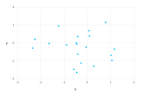

In [81]:
plot(x=randn(20), y=randn(20))

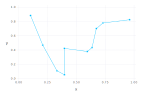

In [82]:
# Geom.point繪製點，Geom.line繪製線，變成折線圖
plot(x=rand(10), y=rand(10), Geom.point, Geom.line)

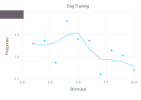

In [83]:
# Scale操作軸的尺度，Geom操作點跟線，Guide增加標題跟軸的標示
plot(x=1:10, y=2.^rand(10), Scale.y_sqrt, Geom.point, Geom.smooth,
     Guide.xlabel("Stimulus"), Guide.ylabel("Response"), Guide.title("Dog Training"))

In [ ]:
# 存檔
myplot = plot(..)

### Plotting DataFrames

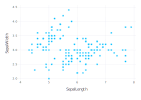

In [84]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth", Geom.point)

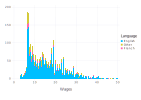

In [85]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)

### Functions and Expressions

當你要畫的東西是function的話，就需要用到這邊的語法

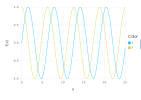

In [86]:
plot([sin, cos], 0, 25)

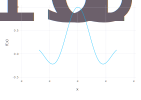

In [87]:
plot((x) -> sin(x)/x, 0.001, 1000, Scale.x_log)

### Layers

當你需要在同一張上畫很多圖，而且他們是疊起來的，你需要用到layer這東西

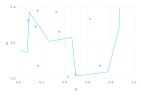

In [88]:
plot(layer(x=rand(10), y=rand(10), Geom.point), layer(x=rand(10), y=rand(10), Geom.line))

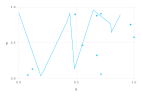

In [89]:
layer1 = layer(x=rand(10), y=rand(10), Geom.point)
layer2 = layer(x=rand(10), y=rand(10), Geom.line)
plot(layer1, layer2)

### Geom

呈現一維資料

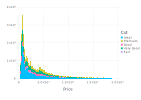

In [90]:
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.histogram)

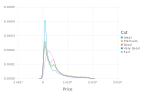

In [91]:
plot(dataset("ggplot2", "diamonds"), x="Price", color="Cut", Geom.density)

呈現二維資料

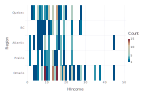

In [92]:
plot(dataset("car", "Womenlf"), x="HIncome", y="Region", Geom.histogram2d)

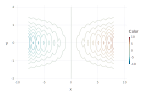

In [93]:
# 等高線圖，梯度
plot(z=(x,y) -> x*exp(-(x-round(Int, x))^2-y^2),
     x=linspace(-8,8,150), y=linspace(-2,2,150), Geom.contour)

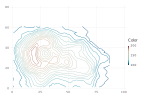

In [94]:
volcano = convert(Array{Float64}, dataset("datasets", "volcano"))
plot(z=volcano, Geom.contour)

數值對類別型

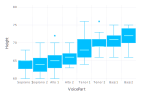

In [95]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.boxplot)

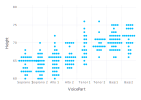

In [96]:
# 類似於盒狀圖，但可以看到更清楚的分佈
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.beeswarm)

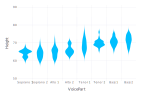

In [97]:
plot(dataset("lattice", "singer"), x="VoicePart", y="Height", Geom.violin)

類別對類別

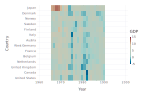

In [98]:
# 以顏色表達第三維
plot(dataset("Zelig", "macro"), x="Year", y="Country", color="GDP", Geom.rectbin)